<a href="https://colab.research.google.com/github/felipesayegg/Machine-Learning/blob/main/ML_Aula03_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introdução**

# **2. Coleta de Dados**

In [ ]:
import pandas as pd #processamento dados
import matplotlib.pyplot as plt #visualização dados


In [ ]:
# importando o conjunto de dados

dados = pd.read_csv("/content/insurance.csv")

In [ ]:
type(dados) #tipo de objeto, dados é dataframe do pandas

pandas.core.frame.DataFrame

In [ ]:
dados.info() #resumo do conjunto de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dados.head(10) # visualizando as 10 primeiras linhas

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
dados.tail(10) #visualizando as 10 ultimas linhas

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [ ]:
dados.describe() #resumo estatístico das variáveis numéricas

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dados.shape #formato do conjunto de dados

(1338, 7)

## **3. Pré Processamento**

In [ ]:
# transformando as informacoes categoricas em numéricas
# criei uma nova coluna chamada sexo com valores 0 e 1, onde 0 é masculino e 1 femino

dados["sexo"] = dados["sex"].map({"male":0, "female":1})

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges,sexo
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [ ]:
 # nesse caso sobrescrevi a coluna smoker pelos valores 1 e 0, nao criei uma nova coluna
 dados ["smoker"] = dados["smoker"].map({"yes":1, "no":0})

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges,sexo
0,19,female,27.900,0,1,southwest,16884.92400,1
1,18,male,33.770,1,0,southeast,1725.55230,0
2,28,male,33.000,3,0,southeast,4449.46200,0
3,33,male,22.705,0,0,northwest,21984.47061,0
4,32,male,28.880,0,0,northwest,3866.85520,0


In [ ]:
#dados.drop(["fuma"], axis=1, inplace=True) # exclui uma coluna especifica do dataset

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges,sexo
0,19,female,27.900,0,1,southwest,16884.92400,1
1,18,male,33.770,1,0,southeast,1725.55230,0
2,28,male,33.000,3,0,southeast,4449.46200,0
3,33,male,22.705,0,0,northwest,21984.47061,0
4,32,male,28.880,0,0,northwest,3866.85520,0


In [ ]:
# dividir por 100 a variavel custo para facilitar a leitura dos dados

dados["custo"] = dados["charges"]/100

# **4. Ajuste do Modelo de Regressão Linear**

In [ ]:
#sklearn biblioteca de machine learning que tem subseções como metrics, linear_model, decision_tree
from sklearn.linear_model import LinearRegression


In [ ]:
# salvando a funcao de regressao linear com o nome reg
reg = LinearRegression()

In [ ]:
# definindo os dados de entradas do modelo de regressao linear
X = dados[["bmi"]]

In [ ]:
y = dados["custo"] # definindo a label ou target

In [ ]:
# ajustando um modelo de regressao linear

reg.fit(X,y)

LinearRegression()

## Modelo de regressao linear

y = b0 + b1*X1

In [ ]:
b0 = reg.intercept_ # valor do coeficiente beta0
b0

11.929372089611476

In [ ]:
b1 = reg.coef_ # valor do coeficiente beta1
b1

array([3.93873031])

## Prevendos novos valores

In [ ]:
IMC = 40

In [ ]:
custo_predito = 11.9 + 3.938 * IMC #funcao custo do modelo de regressao linear

In [ ]:
custo_predito*100

16942.0

In [ ]:
custos = b0 + b1* IMC

# Visualizar o resultado do modelo de regressão linear

In [ ]:
import seaborn as sns # biblioteca para gráficos

In [ ]:
custos_estimados = b0 + b1 * X #   funcao custo estimada pela regressao linear

In [ ]:
y_predito = reg.predict(X) #previsao do modelo de regressao linear

In [ ]:
y_predito

array([121.81994768, 144.94029459, 141.90747225, ..., 157.07158394,
       113.54861404, 126.42826214])

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges,sexo,custo
0,19,female,27.900,0,1,southwest,16884.92400,1,168.849240
1,18,male,33.770,1,0,southeast,1725.55230,0,17.255523
2,28,male,33.000,3,0,southeast,4449.46200,0,44.494620
3,33,male,22.705,0,0,northwest,21984.47061,0,219.844706
4,32,male,28.880,0,0,northwest,3866.85520,0,38.668552


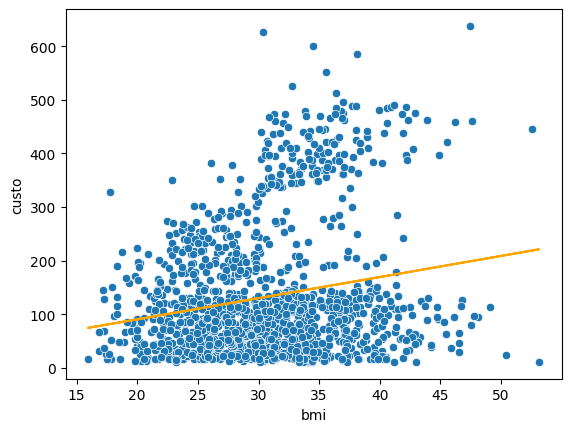

In [ ]:
#grafico do real x predito
sns.scatterplot(x = 'bmi', y = 'custo', data = dados) #gráfico dos pontos em azul
plt.plot(X, y_predito, color = 'orange')


## Validação do Modelo

Da maneira que foi feita anteriormente, não consigo avaliar se o modelo está adequado para prever os custos médicos. Para conseguir avaliação, vou refazer o treinamento utilizando a técnica Hold-Out

In [ ]:
# importando a funcao hold-out

from sklearn.model_selection import train_test_split

In [ ]:
X.shape

(1338, 1)

In [ ]:
1338 * 0.2

267.6

In [ ]:
dados.loc[38,]

,38
age,35
sex,male
bmi,36.67
children,1
smoker,1
region,northeast
charges,39774.2763
sexo,0
custo,397.742763


In [ ]:
 X_treino, X_test, y_treino, y_teste  = train_test_split (X, y , test_size = 0.2)

In [ ]:
X_treino

,bmi
1066,37.290
282,27.645
252,34.210
902,27.265
1031,35.200
...,...
161,36.850
1222,25.300
898,40.260
1210,30.875


#Ajustando o modelo de Regressão Linear nos dados de treino

In [ ]:
regressao = LinearRegression() #definindo o modelo de regressao linear

In [ ]:
regressao.fit(X_treino, y_treino) #ajustando o modelo de regressao linear

LinearRegression()

# Prever os custos nos dados de teste

In [ ]:
y_hat = regressao.predict(X_test)

In [ ]:
y_teste

,custo
82,371.651638
790,56.622250
402,146.926693
1063,65.481950
1103,113.632832
...,...
1197,56.998375
125,33.853991
506,26.432685
10,27.213208


In [ ]:
erro = y_teste - y_hat

In [ ]:
erro.mean()

5.883966483276424

In [ ]:
# Criando um DataFrame com os valores reais e as previsões
df_comparacao = pd.DataFrame({
    'Valor Real': y_teste,
    'Previsão': y_hat})

df_comparacao


,Valor Real,Previsão
82,371.651638,157.832971
790,56.622250,173.640185
402,146.926693,140.229482
1063,65.481950,123.703758
1103,113.632832,152.009260
...,...,...
1197,56.998375,142.441736
125,33.853991,124.422268
506,26.432685,134.122149
10,27.213208,114.722387


In [ ]:
erro

,custo
82,213.818667
790,-117.017935
402,6.697211
1063,-58.221808
1103,-38.376428
...,...
1197,-85.443361
125,-90.568277
506,-107.689464
10,-87.509179


## Avaliando se o modelo está adequado - Calculo do Mean Square Error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error # importando a funcao erro quadratico medio

In [ ]:
mse = mean_squared_error(y_teste, y_hat)
print("Erro quadrático Médio", round(mse,2))
# erro quadrático médio, quanto mais próximo de zero melhor, porém não consigo avaliar se o modelo está bom ou não, uso para comparar modelos entre si

Erro quadrático Médio 14321.85


Outra métrica de avaliação - Mean Absolute Error

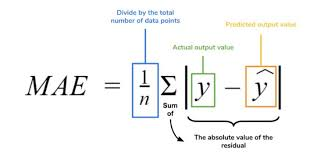

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae = mean_absolute_error(y_teste, y_hat)
print("Erro Absoluto Médio", round(mae,2))

Erro Absoluto Médio 92.58


## Melhorando o modelo, incluindo mais informações

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges,sexo,custo
0,19,female,27.900,0,1,southwest,16884.92400,1,168.849240
1,18,male,33.770,1,0,southeast,1725.55230,0,17.255523
2,28,male,33.000,3,0,southeast,4449.46200,0,44.494620
3,33,male,22.705,0,0,northwest,21984.47061,0,219.844706
4,32,male,28.880,0,0,northwest,3866.85520,0,38.668552


In [ ]:
# y = b0 + b1* BMI + b2 * smoker

<Axes: xlabel='bmi', ylabel='custo'>

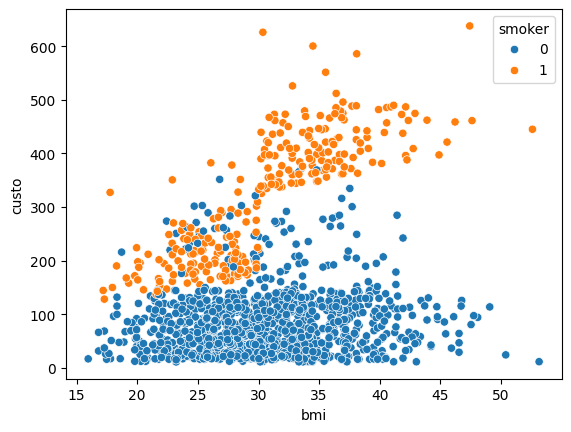

In [ ]:
sns.scatterplot(x = 'bmi', y = 'custo', hue = "smoker", data = dados)

In [ ]:
X = dados[["bmi", "smoker"]]

In [ ]:
y = dados["custo"]

In [ ]:
X_treino, X_test, y_treino, y_teste  = train_test_split (X, y , test_size = 0.2, random_state = 540)

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_treino, y_treino)

LinearRegression()

In [ ]:
predito = reg.predict(X_test)

In [ ]:
erro_quadratico = mean_squared_error(y_teste, predito)
print("Erro Quadrático Médio", round(erro_quadratico,2))

Erro Quadrático Médio 5603.86


In [ ]:
erro_absoluto = mean_absolute_error(y_teste, predito)
print("Erro Absoluto Médio", round(erro_absoluto,2))

Erro Absoluto Médio 57.38


Incluindo a variável smoker no modelo de regressao linear, tanto o erro quadrático médio como o erro absoluto médio ficaram mais próximo de zero do que o modelo de regressão linear apenas o a variavel BMI.

Com isso concluímos que o modelo dois é o melhor modelo.

# Criando o gráfico com o resultado

In [ ]:
predito_total = reg.predict(X)

In [ ]:
b0 = reg.intercept_
b1 = reg.coef_[0]
b2 = reg.coef_[1]

In [ ]:
X.describe()

,bmi,smoker
count,1338.000000,1338.000000
mean,30.663397,0.204783
std,6.098187,0.403694
min,15.960000,0.000000
25%,26.296250,0.000000
50%,30.400000,0.000000
75%,34.693750,0.000000
max,53.130000,1.000000


In [ ]:
# Gráfico do Ajuste com DUAS Variáveis

x = dados["bmi"]
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

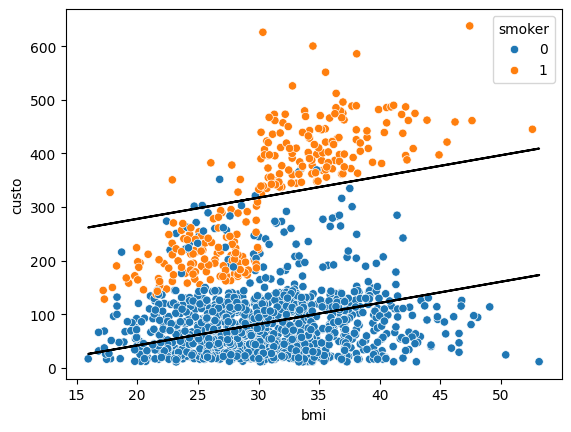

In [ ]:
#grafico do real x predito
sns.scatterplot(x = 'bmi', y = 'custo', hue = "smoker", data = dados) #gráfico dos pontos em azul
plt.plot(x, y0, color = 'black')

plt.plot(x, y1, color = 'black')



## Prevendo novas informações

In [ ]:
imc = 40
smoker = 1

In [ ]:
X = [[imc, smoker]]

TypeError: list indices must be integers or slices, not str

In [ ]:
reg.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([357.06662692])

In [ ]:
def previsao_custo( imc, fumante):
  y_hat = reg.predict([[imc, fumante]])
  return print( "O custo médico é de:", round(y_hat[0]*100,2))

In [ ]:
previsao_custo(20, 0)

O custo médico é de: 4204.75


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Exercício:

1. Criar uma função que emita uma frase como
- digite seu peso
- digite sua altura
- Você fuma? Sim = 1, não = 0
- calcule o imc
- Retorno o custo médico
- Retorno o preco do seguro

2. Inclua outras informacoes no modelo e calcule o MAE e MSE
